# Convolution
Convolution is a fundamental operation in many fields, including signal processing, image processing, and deep learning. It involves the blending of two functions to produce a third function that expresses how the shape of one is modified by the other. In the context of discrete data, convolution is the process of applying a filter or kernel to an input to produce an output. This operation is central to many applications, from image blurring and sharpening to feature extraction in neural networks.

## Historical Background
Convolution has its roots in the mathematical fields of integral transforms and functional analysis. The concept has been widely used in engineering disciplines, particularly in systems theory and communications, where it describes the output of linear time-invariant systems. In recent decades, convolution has gained immense popularity in the field of computer vision and deep learning, revolutionizing how machines perceive and interpret visual data.

## Mathematical Definition
In the continuous domain, the convolution of two functions 

$$
(f∗g)(t)= \int_{-\infty}^{\infty}
 f(τ)g(t−τ)dτ
$$

In the discrete domain, which is more relevant for digital signal processing and image processing, the convolution of two sequences 
𝑓
f and 
𝑔
g is given by:

$$
(f∗g)[n]= \sum_{m=-\infty}^{\infty} f[m]g[n-m]
$$

# Convolution in Deep Learning
In the realm of deep learning, convolutional neural networks (CNNs) leverage the convolution operation to automatically learn and extract hierarchical features from input data, such as images. The convolutional layers apply multiple filters to the input, capturing various aspects like edges, textures, and patterns. This process significantly improves the network's ability to recognize and classify objects within images.

# Properties of Convolution
Some important properties of convolution include:

Commutativity: The order of convolution does not affect the result.

Associativity: Convolution is associative, meaning that the grouping of functions does not affect the final output.

Distributivity over addition: Convolution distributes over addition, allowing the convolution of two functions to be added before or after convolution.

Identity element: The identity element of convolution is the Dirac delta function, which acts as a neutral element when convolved with another function.


# References:


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 1D Convolution

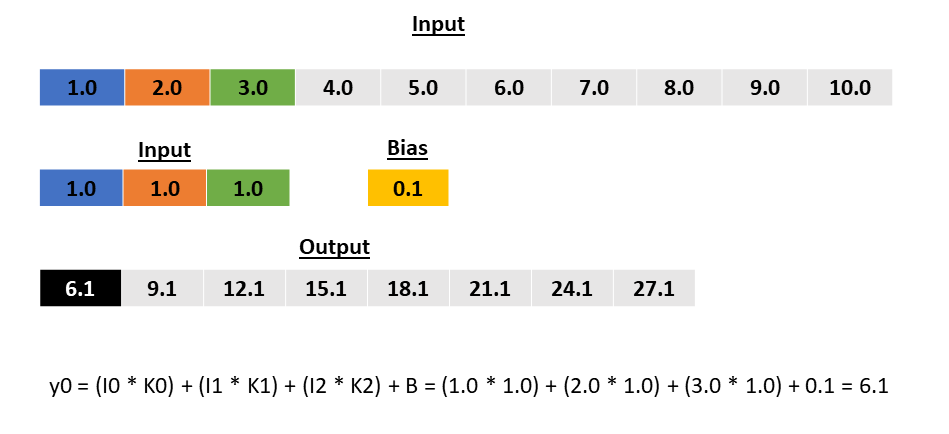

## Best Practices:
1. Weight Initialization:
   * Use Kaiming Initialization for ReLU activation.
    nn.init.kaiming_uniform_(conv1d.weight, nonlinearity='relu')
2. Kernel Size:
   * Small Kernels (e.g., 3): Commonly used in many applications as they can capture local patterns and are computationally efficient.
   * Larger Kernels: Can be useful for capturing more extended dependencies. However, they are more computationally expensive and can increase the risk of overfitting.
   * Odd Sizes: Typically preferred to maintain symmetry, ensuring that each output feature is centered relative to the input features.
3. Use of Bias:
   * With Bias: Bias terms allow the network to learn an additional degree of freedom, which can help the model fit the data better.
   * Without Bias: In some normalization techniques, such as Batch Normalization, biases are less critical because the normalization layer can shift the output.
4. Padding:
   * Valid Padding (No Padding): Reduces the spatial dimensions of the input.
   * Same Padding: Ensures the output has the same dimensions as the input, which can be crucial for certain applications.
   * Custom Padding: Allows for specific control over the padding size, which can be useful for specific tasks.
5. Activation Function
   * nn.ReLU() or nn.LeakyReLU() for ReLU activation.
6. Stride:
   * Stride of 1: Ensures every position of the input is considered, preserving more detail.
   * Larger Stride: Reduces the spatial dimensions and computation, useful for downsampling but at the cost of some detail. 
7. Dropout
   * nn.Dropout(p=0.5)
8. Batch Normalization
   * nn.BatchNorm1d(num_features)
9. Network Architecture:
   * Stacking Convolutions: Multiple convolutional layers can be stacked to learn more complex features.
   * Residual Connections: Can help in training deeper networks by allowing gradients to flow more easily.
   * Pooling Layers: Often used after convolutions to reduce spatial dimensions and aggregate information.

In [2]:
signal1d = torch.tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]], dtype=torch.float32)

In [3]:
# 1D convolution
conv1d = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3)
conv1d.weight.data = torch.tensor([[[1.0, 1.0, 1.0]]], dtype=torch.float32)
conv1d.bias.data = torch.tensor([0.1], dtype=torch.float32)
output = conv1d(signal1d.view(1, -1))
print(f"Input shape: {signal1d.shape}")
print(f"Convolutional output shape: {output.shape}")
print(output)

Input shape: torch.Size([1, 10])
Convolutional output shape: torch.Size([1, 8])
tensor([[ 6.1000,  9.1000, 12.1000, 15.1000, 18.1000, 21.1000, 24.1000, 27.1000]],
       grad_fn=<SqueezeBackward1>)


In [4]:
# 1D convolution with padding (padding=1 adds 0s to the beginning and end of the signal)
conv1d = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, padding=1)
conv1d.weight.data = torch.tensor([[[1.0, 1.0, 1.0]]], dtype=torch.float32)
conv1d.bias.data = torch.tensor([0.1], dtype=torch.float32)
output = conv1d(signal1d.view(1, -1))
print(f"Input shape: {signal1d.shape}")
print(f"Convolutional output shape: {output.shape}")
print(output)

Input shape: torch.Size([1, 10])
Convolutional output shape: torch.Size([1, 10])
tensor([[ 3.1000,  6.1000,  9.1000, 12.1000, 15.1000, 18.1000, 21.1000, 24.1000,
         27.1000, 19.1000]], grad_fn=<SqueezeBackward1>)


In [5]:
# 1D convolution
conv1d = nn.Conv1d(in_channels=1, out_channels=2, kernel_size=3)
conv1d.weight.data = torch.tensor([
    [[1.0, 1.0, 1.0]],
    [[2.0, 2.0, 2.0]],
    ], dtype=torch.float32)
conv1d.bias.data = torch.tensor([0.1, 0.2], dtype=torch.float32)
output = conv1d(signal1d.view(1, -1))
print(f"Input shape: {signal1d.shape}")
print(f"Convolutional output shape: {output.shape}")
print(output)

Input shape: torch.Size([1, 10])
Convolutional output shape: torch.Size([2, 8])
tensor([[ 6.1000,  9.1000, 12.1000, 15.1000, 18.1000, 21.1000, 24.1000, 27.1000],
        [12.2000, 18.2000, 24.2000, 30.2000, 36.2000, 42.2000, 48.2000, 54.2000]],
       grad_fn=<SqueezeBackward1>)


# 2D Convolution